###1.Importing libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

###2. Function

In [ ]:
def traveling_prediction(y,X,check):
  X = np.array(X)
  y = np.array(y)
  Xtrain,Xtest,ytrain,ytest = train_test_split(X.reshape(len(X),1),y,random_state=1)

  tree_model = tree.DecisionTreeClassifier(max_depth=1)
  tree_model.fit(Xtrain,ytrain)
  print("Tree model training score: ")
  print(tree_model.score(Xtrain,ytrain))
  print("Tree model testing score: ")
  print(tree_model.score(Xtest,ytest))

  y_predicted = tree_model.predict_proba(Xtest)[:,1]
  fpr,tpr,thresholds = metrics.roc_curve(ytest,y_predicted)
  print("AUC for ROC")
  print(metrics.roc_auc_score(ytest,y_predicted)) 

  if check == True:
      fig, axes = plt.subplots(2,1,figsize=[5,15])
      sns.boxplot(ax = axes[0], y= X,x = y)
      axes[0].set_title("Prediction on survival rate")
      axes[0].set(xlabel='Survived?',ylabel='Classifier')
      sns.lineplot(ax=axes[1],x=fpr,y=tpr)
      sns.lineplot([0,1],[0,1])
      axes[1].set_title("ROC curve")
      axes[1].set(xlabel='false positive rate',ylabel='true positive rate')

###Load dataset

In [ ]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


###Prediction on survival rate using ticket fare

Tree model training score: 
0.6302395209580839
Tree model testing score: 
0.5739910313901345
AUC for ROC
0.6474506578947368


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


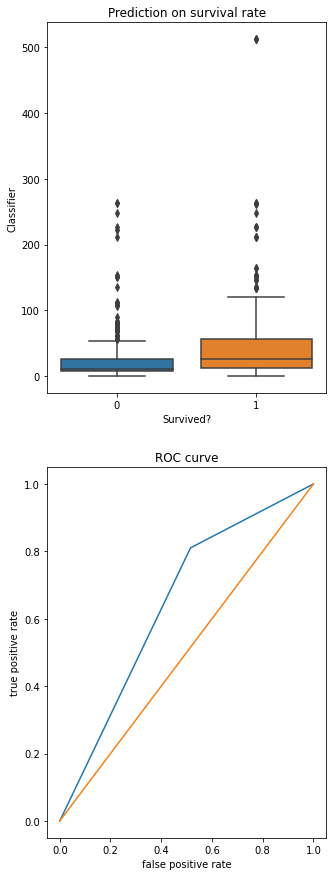

In [ ]:
traveling_prediction(data['survived'],data['fare'],True)

###Prediction on survival rate using pclass

Tree model training score: 
0.6751497005988024
Tree model testing score: 
0.6457399103139013
AUC for ROC
0.6439144736842105


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


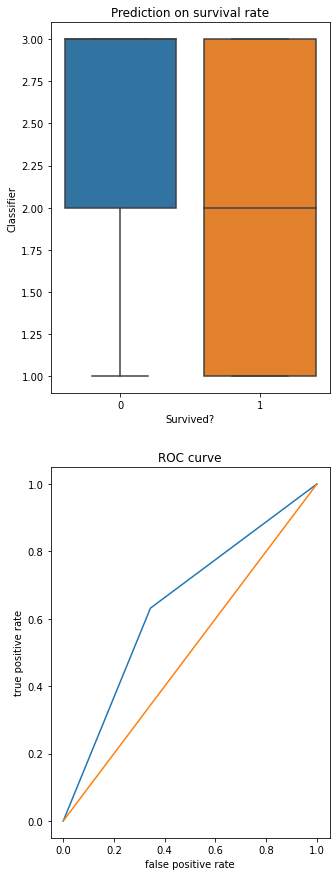

In [ ]:
traveling_prediction(data['survived'],data['pclass'],True)

According to both models, using fare as a classifier yields a AUC result of 0.6474506578947368 while using 'pclass' as a classifier yields 0.6439144736842105. Therefore, 'fare' is a better predictor in terms of survival rate compares to 'pclass'! 